# THE SPARKS FOUNDATION


## **Objective:**  

● Create a storyboard showing spread of Covid-19 cases in your country or any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP

● Use animation, timeline and annotations to create attractive and interactive  dashboards and story

● Identify interesting patterns and possible reasons helping Covid-19 spread 
with basic as well as advanced charts

## **Author : Utkarsha Sathe**


# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pylab as pl
import seaborn as sns
%matplotlib inline

# **Reading the Dataset**

In [ ]:
covid_data = pd.read_csv('A:/college/PG/2ND SEM/INTERNSHIPS/task 8/Covid data.csv');
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,13-04-21,57364.0,122.0,83.571,2529.0,0.0,2.429,1473.579,3.134,2.147,64.966,0.000,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,OWID_AFR,NaN,Africa,13-04-21,4370297.0,9910.0,11506.857,116378.0,404.0,294.143,3259.961,7.392,8.583,86.811,0.301,0.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,13-04-21,128752.0,234.0,259.429,2326.0,5.0,6.143,44739.732,81.312,90.148,808.256,1.737,2.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,DZA,Africa,Algeria,13-04-21,118799.0,154.0,131.429,3137.0,3.0,3.571,2709.149,3.512,2.997,71.538,0.068,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,AND,Europe,Andorra,13-04-21,12614.0,33.0,40.857,121.0,0.0,0.571,163256.326,427.102,528.792,1566.039,0.000,7.396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868


In [ ]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,1.965800e+04,19658.000000,19653.000000,1.861700e+04,18617.000000,19653.000000,19559.000000,19559.000000,19554.000000,18518.000000,18518.000000,19554.000000,17590.000000,2020.000000,2020.000000,2409.000000,2409.000000,193.000000,193.000000,284.000000,284.000000,8.983000e+03,8.837000e+03,8837.000000,8983.000000,1.069000e+04,10690.000000,10413.000000,10347.000000,6.868000e+03,6.249000e+03,4.639000e+03,5.828000e+03,1.115600e+04,6868.000000,6249.000000,4639.000000,11156.000000,16403.000000,2.060300e+04,19162.000000,18090.000000,17894.000000,17991.000000,18371.000000,12340.000000,18434.000000,18780.000000,14136.000000,13938.000000,9390.000000,16509.000000,19663.000000,18325.000000
mean,1.802537e+06,8472.971360,8420.510859,4.187765e+04,190.433314,179.817813,22809.997573,124.311967,124.009013,440.514962,2.289681,2.165280,0.968352,1657.966832,43.210174,7795.299294,301.907626,445.467575,39.335632,5746.649338,175.210577,6.797481e+04,1.259080e+07,494.914683,3.704362,6.283004e+04,3.319216,0.095782,183.976544,1.194782e+07,7.813028e+06,3.756732e+06,3.988696e+05,2.079641e+05,11.338454,8.076844,4.227915,2681.789441,56.958219,1.138783e+08,404.003900,30.203919,8.583273,5.425387,18956.394525,13.927075,262.572304,7.944101,10.407586,32.686679,50.267922,2.999803,73.180305,0.721972
std,9.215381e+06,44771.850805,43917.625818,2.064760e+05,989.140309,933.133406,27652.477737,212.702950,185.157092,541.286724,4.524772,3.563644,0.282733,3780.954077,28.847292,15931.585448,241.441226,742.957348,54.401958,14303.455449,228.869743,2.010560e+05,4.257646e+07,730.092901,9.983752,1.794474e+05,7.628472,0.086247,1055.447291,5.008217e+07,2.983659e+07,1.350097e+07,1.533447e+06,1.011017e+06,19.778159,12.663238,8.832639,4887.160052,19.350378,6.450853e+08,1940.108053,9.108922,6.151026,4.195496,20185.858641,20.164511,120.662178,4.211477,10.374848,13.520521,31.729422,2.439388,7.576438,0.150048
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-34.000000,-0.143000,3.256000,-1590.147000,-133.099000,0.060000,-2.515000,-0.359000,0.000000,0.000000,0.000000,0.000000,0.000000,0.858000,1.056000,0.937000,2.746000,-2.391720e+05,2.158400e+04,3.713000,-23.010000,1.040000e+02,0.002000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.780000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,7.346750e+03,9.000000,22.714000,1.460000e+02,0.000000,0.143000,1315.333000,1.196500,3.746000,24.359000,0.000000,0.026000,0.850000,128.750000,25.754250,652.000000,114.030000,31.941000,10.651000,258.006750,58.850750,3.496000e+03,7.597130e+05,68.396000,0.357500,3.470250e+03,0.305000,0.029000,7.200000,6.494825e+04,5.807700e+04,2.805200e+04,3.889250e+03,9.700000e+02,1.020000,0.870000,0.370000,332.750000,44.440000,1.886202e+06,35.8

# **Checking for count of all the unique values present for each attribute**

In [ ]:
covid_data.nunique()

iso_code                                   215
continent                                    6
location                                   215
date                                        99
total_cases                              15428
new_cases                                 5547
new_cases_smoothed                        9778
total_deaths                              8351
new_deaths                                1415
new_deaths_smoothed                       2844
total_cases_per_million                  16035
new_cases_per_million                    12893
new_cases_smoothed_per_million           14492
total_deaths_per_million                 12135
new_deaths_per_million                    4065
new_deaths_smoothed_per_million           5171
reproduction_rate                          203
icu_patients                              1198
icu_patients_per_million                  1538
hosp_patients                             1925
hosp_patients_per_million                 2190
weekly_icu_ad

# **Checking for count of NULL values for each column:**

In [ ]:
covid_data.isnull().sum()

iso_code                                     0
continent                                  890
location                                     0
date                                         0
total_cases                               1115
new_cases                                 1115
new_cases_smoothed                        1120
total_deaths                              2156
new_deaths                                2156
new_deaths_smoothed                       1120
total_cases_per_million                   1214
new_cases_per_million                     1214
new_cases_smoothed_per_million            1219
total_deaths_per_million                  2255
new_deaths_per_million                    2255
new_deaths_smoothed_per_million           1219
reproduction_rate                         3183
icu_patients                             18753
icu_patients_per_million                 18753
hosp_patients                            18364
hosp_patients_per_million                18364
weekly_icu_ad

# **Continents in terms of occurence of covid cases on basis of iso_codes**

In [ ]:
covid_data.continent.value_counts()[0:10]

Africa           5381
Europe           4945
Asia             4729
North America    2708
South America    1246
Oceania           874
Name: continent, dtype: int64

**Analysis of Covid Cases across Asia:**

# ***Collecting Asia Data from the given dataset***

In [ ]:
asia_data = covid_data[covid_data['continent'] =='Asia']
asia_data = asia_data[asia_data['date'] =='13-04-21']
asia_data = asia_data[~asia_data['location'].isin(['World','International'])]
asia_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,13-04-21,57364.0,122.0,83.571,2529.0,0.0,2.429,1473.579,3.134,2.147,64.966,0.000,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,ARM,Asia,Armenia,13-04-21,204053.0,726.0,882.857,3775.0,22.0,21.143,68861.588,245.003,297.937,1273.946,7.424,7.135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2963234.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.2,75.09,0.776
12,AZE,Asia,Azerbaijan,13-04-21,289601.0,2457.0,2247.429,3978.0,34.0,33.571,28562.580,242.327,221.658,392.340,3.353,3.311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10139175.0,119.309,32.4,6.018,3.871,15847.419,NaN,559.812,7.11,0.3,42.5,83.241,4.7,73.00,0.756
14,BHR,Asia,Bahrain,13-04-21,158789.0,1060.0,1139.714,566.0,4.0,3.000,93318.398,622.949,669.796,332.631,2.351,1.763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18706.0,3798472.0,2232.317,10.993,18454.0,10.845,NaN,NaN,units unclear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1701583.0,1935.907,32.4,2.372,1.387,43290.705,NaN,151.689,16.52,5.8,37.6,NaN,2.0,77.29,0.852
15,BGD,Asia,Bangladesh,13-04-21,697985.0,6028.0,6619.000,9891.0,69.0,72.429,4238.191,36.602,40.191,60.059,0.419,0.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164689383.0,1265.036,27.5,5.098,3.262,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.632


In [ ]:
top_10_asia_deaths  = asia_data.sort_values("total_deaths", ascending = False)
top_10_asia_deaths.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
80,IND,Asia,India,13-04-21,13873825.0,184372.0,153148.571,172085.0,1027.0,844.000,10053.464,133.602,110.977,124.699,0.744,0.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400122.0,259207108.0,187.831,1.015,1282263.0,0.929,NaN,NaN,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645
83,IRN,Asia,Iran,13-04-21,2118212.0,24760.0,22116.857,65055.0,291.0,221.286,25218.925,294.787,263.318,774.529,3.465,2.635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.399295e+07,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68,0.783
81,IDN,Asia,Indonesia,13-04-21,1577526.0,5702.0,5001.429,42782.0,126.0,115.000,5767.421,20.846,18.285,156.411,0.461,0.420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.735236e+08,145.725,29.3,5.319,3.053,11188.744,5.7,342.864,6.32,2.8,76.1,64.204,1.04,71.72,0.718
183,TUR,Asia,Turkey,13-04-21,3962760.0,59187.0,54796.429,34455.0,273.0,255.429,46986.055,701.774,649.716,408.530,3.237,3.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.433907e+07,104.914,31.6,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.820
135,PAK,Asia,Pakistan,13-04-21,734423.0,4503.0,4890.714,15754.0,135.0,104.000,3324.801,20.385,22.141,71.320,0.611,0.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50520.0,10829994.0,49.028,0.229,48090.0,0.218,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.208923e+08,255.573,23.5,4.495,2.780,5034.708,4.0,423.031,8.35,2.8,36.7,59.607,0.60,67.27,0.557


Text(0.5, 1.0, 'Total deaths across asian countries')

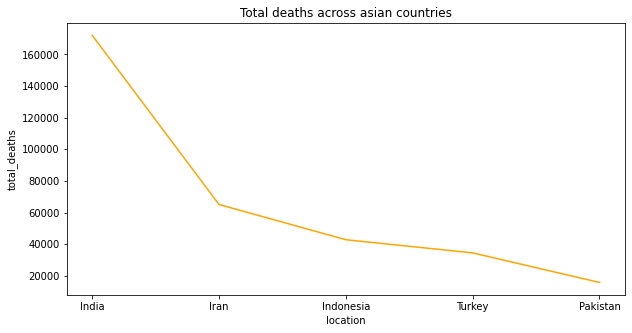

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='location',y='total_deaths',data=top_10_asia_deaths[0:5],color='orange')
plt.title("Total deaths across asian countries")

# ***Asian countries with least number of  total_cases being reported:***

In [ ]:
least_asia_cases = asia_data.sort_values("total_cases_per_million",ascending =True)
least_asia_cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
96,LAO,Asia,Laos,13-04-21,52.0,0.0,0.429,NaN,NaN,0.000,7.147,0.000,0.059,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.275556e+06,29.715,24.4,4.029,2.322,6397.360,22.7,368.111,4.00,7.3,51.2,49.839,1.50,67.92,0.613
194,VNM,Asia,Vietnam,13-04-21,2714.0,9.0,9.429,35.0,0.0,0.000,27.882,0.092,0.097,0.360,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.733858e+07,308.127,32.6,7.150,4.718,6171.884,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704
175,TWN,Asia,Taiwan,13-04-21,1062.0,4.0,1.714,11.0,0.0,0.143,44.590,0.168,0.072,0.462,0.000,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.381678e+07,NaN,42.2,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN,80.46,NaN
37,CHN,Asia,China,13-04-21,102103.0,25.0,26.143,4844.0,1.0,0.429,70.938,0.017,0.018,3.365,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.439324e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761
196,YEM,Asia,Yemen,13-04-21,5507.0,61.0,76.000,1073.0,5.0,13.857,184.638,2.045,2.548,35.975,0.168,0.465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470


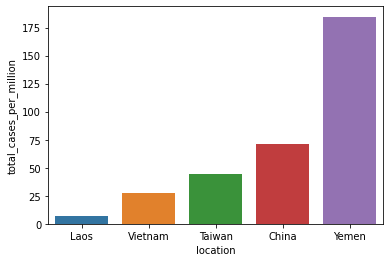

In [ ]:
sns.barplot(x="location", y="total_cases_per_million", data=least_asia_cases.head())

Text(0.5, 1.0, 'Total Cases vs Total Death Scenarios')

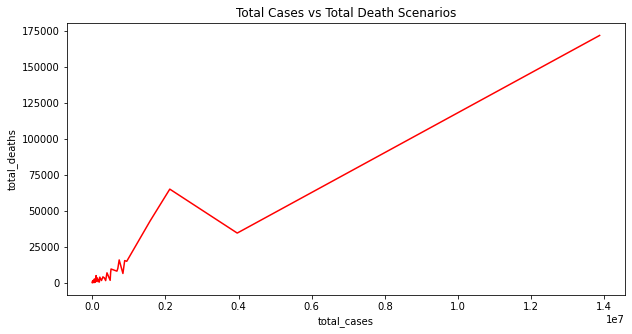

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='total_cases',y='total_deaths',data=asia_data,color="red")
plt.title("Total Cases vs Total Death Scenarios")

# **Conclusions:**
1. India is the one of the most affected Asian country as it has the highest number of deaths.
2. Laos has reported the least number of cases in Asia.